<a href="https://colab.research.google.com/github/tusita3660/DLProjects/blob/main/CNN_Devnagri_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/DLML/Devanagari.zip" -d "/content/drive/MyDrive/DLML/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/018_09.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/018_10.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/019_01.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/019_02.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/019_03.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/019_04.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/019_05.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/020_01.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/020_02.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/020_03.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/020_04.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/020_05.jpg  
 extracting: /content/drive/MyDrive/DLML/Devanagari/TRAIN/20/

In [3]:
import cv2
from PIL import Image


In [10]:
#Open and read images
dev_img = Image.open("/content/drive/MyDrive/DLML/Devanagari/TRAIN/1/010_09.jpg")
dev_img1 = Image.open("/content/drive/MyDrive/DLML/Devanagari/TRAIN/2/010_09.jpg")
dev_img2 = Image.open("/content/drive/MyDrive/DLML/Devanagari/TRAIN/3/010_09.jpg")
dev_img3 = Image.open("/content/drive/MyDrive/DLML/Devanagari/TRAIN/4/010_09.jpg")
dev_img4 = Image.open("/content/drive/MyDrive/DLML/Devanagari/TRAIN/5/010_09.jpg")

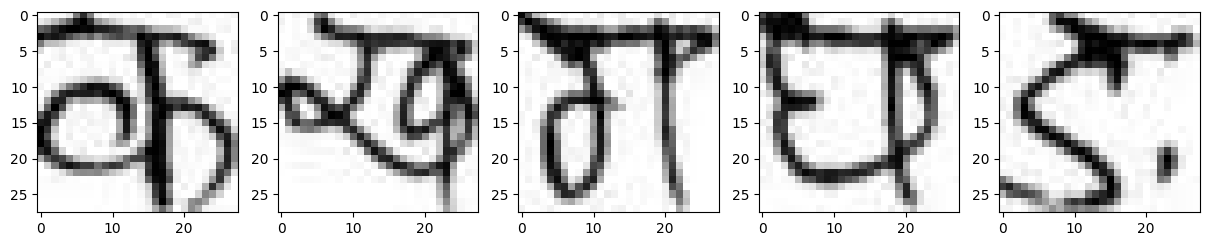

In [11]:
fig = plt.figure(figsize = (15,3))
# subplot(1, 5, 1)
plt.subplot(1, 5, 1)
img_plot = plt.imshow(dev_img, cmap = 'gray')
plt.subplot(1, 5, 2)
img_plot = plt.imshow(dev_img1, cmap = 'gray')
plt.subplot(1, 5, 3)
img_plot = plt.imshow(dev_img2, cmap = 'gray')
plt.subplot(1, 5, 4)
img_plot = plt.imshow(dev_img3, cmap = 'gray')
plt.subplot(1, 5, 5)
img_plot = plt.imshow(dev_img4, cmap = 'gray')
plt.show()


In [12]:
train_folder = "/content/drive/MyDrive/DLML/Devanagari/TRAIN"
test_folder = "/content/drive/MyDrive/DLML/Devanagari/TEST"

#### Data Augmentaion
Process of generating train data samples by the help of preprocessing the image dataset.

In [13]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


In [19]:
img = load_img(train_folder + "/2/010_09.jpg")
data = img_to_array(img)
data

array([[[246., 246., 246.],
        [255., 255., 255.],
        [244., 244., 244.],
        ...,
        [254., 254., 254.],
        [252., 252., 252.],
        [249., 249., 249.]],

       [[241., 241., 241.],
        [255., 255., 255.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [251., 251., 251.]],

       [[250., 250., 250.],
        [255., 255., 255.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [243., 243., 243.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [253., 253., 253.],
        [254., 254., 254.],
        [253., 253., 253.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [247., 247., 247.],
        [251., 251., 251.],
        [252., 252., 252.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [16]:
print(data.shape)
samples = expand_dims(data, axis = 0)
print(samples.shape) # 1 -> image with 28x28 RGB

(28, 28, 3)
(1, 28, 28, 3)


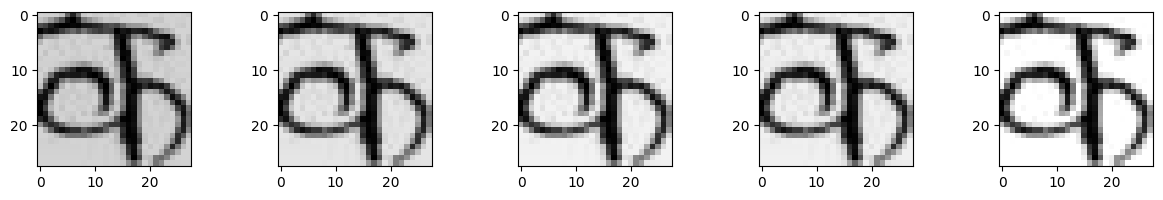

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [23]:
datagen = ImageDataGenerator(brightness_range= [0.8, 1.2])
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (15, 2))
for i in range(5):
  fig = plt.figure()  # Remove this line to avoid creating a new figure each time
  batch = next(IDG)  # Change IDG.next() to next(IDG) #used to retrieve the next item from an iterator
  image = batch[0].astype('uint8')
  ax[i].imshow(image)
plt.show()

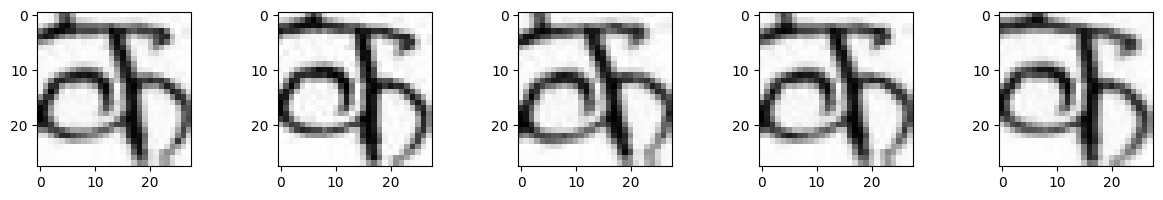

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [25]:
datagen = ImageDataGenerator(rotation_range= 10) # 0 to 20%
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (15, 2))
for i in range(5):
  fig = plt.figure()  # Remove this line to avoid creating a new figure each time
  batch = next(IDG)  # Change IDG.next() to next(IDG) #used to retrieve the next item from an iterator
  image = batch[0].astype('uint8')
  ax[i].imshow(image)
plt.show()

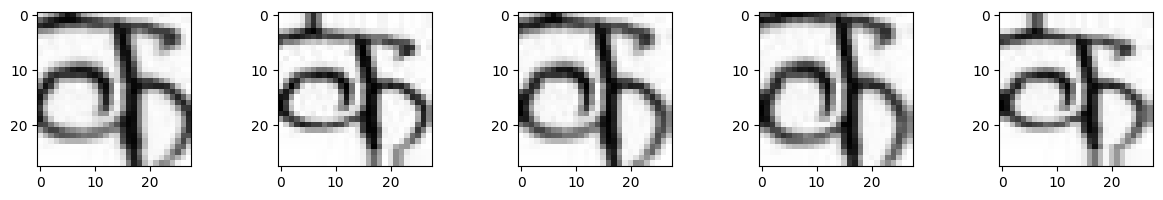

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
# zoom range : 0-20% zoom-in and zoom-out
datagen = ImageDataGenerator(zoom_range = 0.2)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (15, 2))
for i in range(5):
    fig = plt.figure()
    # next() is used to retrieve the next item from an iterator
    batch = next(IDG)
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

In [27]:
data

array([[[246., 246., 246.],
        [255., 255., 255.],
        [244., 244., 244.],
        ...,
        [254., 254., 254.],
        [252., 252., 252.],
        [249., 249., 249.]],

       [[241., 241., 241.],
        [255., 255., 255.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [251., 251., 251.]],

       [[250., 250., 250.],
        [255., 255., 255.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [243., 243., 243.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [253., 253., 253.],
        [254., 254., 254.],
        [253., 253., 253.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [247., 247., 247.],
        [251., 251., 251.],
        [252., 252., 252.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [28]:
# rescale = Image Pixel Normalization, zoom range = 20% , brightness range = 80% to 120% , rotation range = 20 degree
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, brightness_range = [0.8, 1.2], rotation_range = 20)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# clacategorical = multi-class classification, binary = 'binary-class classification'
#target_size = output image size
training_set = train_datagen.flow_from_directory(train_folder, target_size = (64,64), batch_size = 64, class_mode = 'categorical')
testing_set = test_datagen.flow_from_directory(test_folder, target_size = (64,64), batch_size = 64, class_mode = 'categorical')

Found 6528 images belonging to 48 classes.
Found 3312 images belonging to 48 classes.


In [30]:
training_set.image_shape

(64, 64, 3)

In [31]:
training_set.class_indices

{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8,
 '18': 9,
 '19': 10,
 '2': 11,
 '20': 12,
 '21': 13,
 '22': 14,
 '23': 15,
 '24': 16,
 '25': 17,
 '26': 18,
 '27': 19,
 '28': 20,
 '29': 21,
 '3': 22,
 '30': 23,
 '31': 24,
 '32': 25,
 '33': 26,
 '34': 27,
 '35': 28,
 '36': 29,
 '37': 30,
 '38': 31,
 '39': 32,
 '4': 33,
 '40': 34,
 '41': 35,
 '42': 36,
 '43': 37,
 '44': 38,
 '45': 39,
 '46': 40,
 '47': 41,
 '48': 42,
 '5': 43,
 '6': 44,
 '7': 45,
 '8': 46,
 '9': 47}

## CNN -> convolved neural network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
   model = Sequential()
   # conv2d
   model.add(Conv2